In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
import io
df_ex = pd.read_csv('exercise.csv')

In [3]:
df_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df_cal = pd.read_csv('calories.csv')
df_cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df = pd.merge(df_ex, df_cal, on='User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df['Gender'] = pd.get_dummies(df['Gender'], prefix_sep='_', drop_first=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


User_ID      -0.001661
Gender        0.022357
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Calories      1.000000
Name: Calories, dtype: float64


<AxesSubplot:>

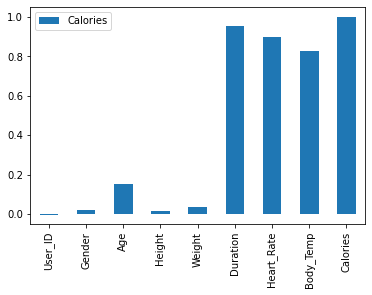

In [7]:
correlation = df.corr()['Calories']
print(correlation) 
correlation.to_frame().plot.bar()

In [8]:
df = df.drop(columns=['User_ID'], axis=1)   
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


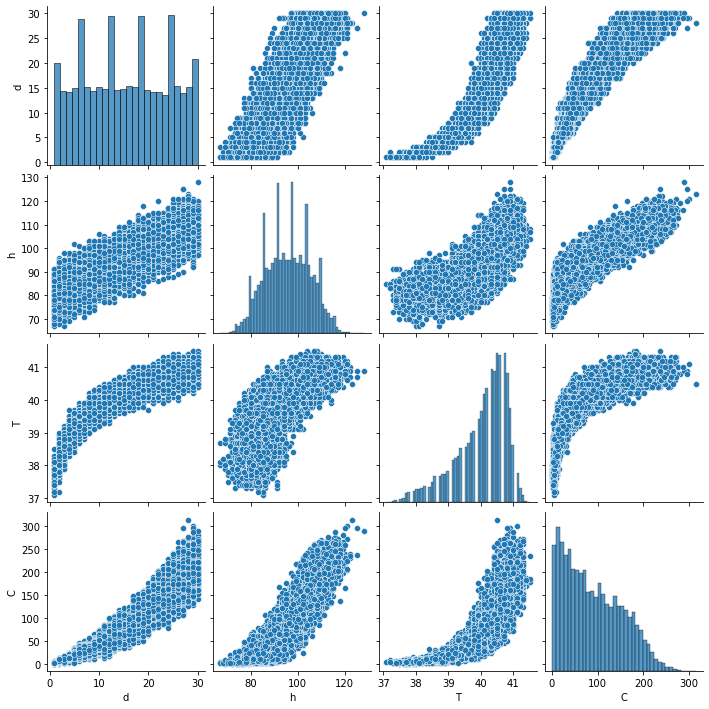

In [13]:
df_3f = df[['Duration','Heart_Rate','Body_Temp','Calories']].copy()
df_3f.rename(columns={'Duration':'d',
                     'Heart_Rate':'h',
                     'Body_Temp':'T',
                     'Calories':'C'}, inplace = True)

df_6f = df[['Duration','Heart_Rate','Body_Temp','Height','Weight','Age','Calories']].copy()
df_6f.rename(columns={'Duration':'d',
                     'Heart_Rate':'h',
                     'Body_Temp':'T',
                     'Calories':'C',
                     'Height':'H',
                     'Weight':'W',
                     'Age':'A'}, inplace = True)

df_7f = df[['Duration','Heart_Rate','Body_Temp','Height','Weight','Age','Gender','Calories']].copy()
df_7f.rename(columns={'Duration':'d',
                     'Heart_Rate':'h',
                     'Body_Temp':'T',
                     'Calories':'C',
                     'Height':'H',
                     'Weight':'W',
                     'Age':'A',
                     'Gender':'G'}, inplace = True)

sns.pairplot(df_3f)


### One feature Regression

In [14]:
C_i = df_3f['C'].to_numpy()
d_i = df_3f['d'].to_numpy()

d_train, d_test, C_train, C_test = train_test_split(d_i, C_i, test_size=0.33, random_state = 42)

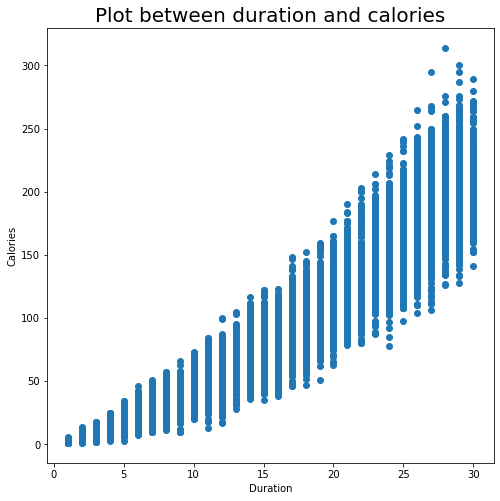

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df_3f['d'], df_3f['C'])
plt.ylabel('Calories')
plt.xlabel('Duration')
plt.title('Plot between duration and calories', size=20)
plt.show()

### Linear model

In [16]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(d_train.reshape(-1, 1), C_train.reshape(-1, 1))


LinearRegression()

Text(0, 0.5, 'Calories')

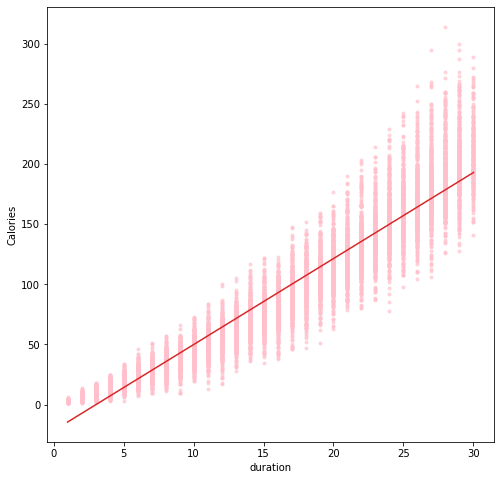

In [19]:
d_val = np.linspace(d_i.min(), d_i.max(), 100)
C_lin_model = lin_reg.predict(d_val.reshape(-1, 1))
plt.figure(figsize=(8,8))
plt.scatter(df['Duration'],df['Calories'],c='pink',label = 'observations',alpha = 0.6,marker='.',zorder=1)
plt.plot(d_val, C_lin_model, c='tab:red', ls='-', zorder=2)
plt.xlabel('duration')
plt.ylabel('Calories')

In [20]:
C_lin_test = lin_reg.predict(d_test.reshape(-1,1))
print('mean_squared_error : ', mean_absolute_error(C_test, C_lin_test))
print('R2 value : ', r2_score(C_test, C_lin_test))

mean_squared_error :  13.612964782017263
R2 value :  0.9127485305003333


In [21]:
pr = lin_reg.predict([[25]])
print(pr)

[[157.11930405]]


In [22]:
i = int(input())
print(lin_reg.predict([[i]]))

25
[[157.11930405]]


### Quadratic model
 

Text(0.5, 1.0, 'Calories burned vs Duration of exercise')

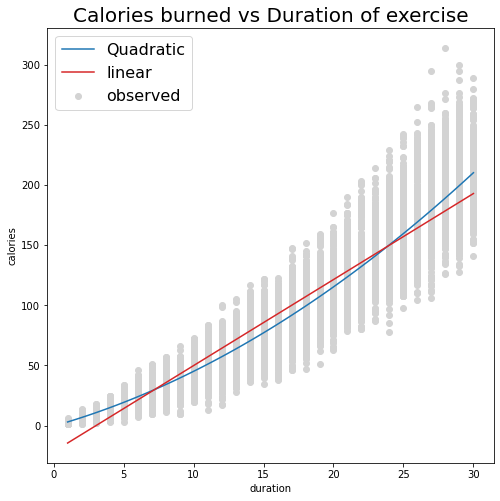

In [24]:
from sklearn.preprocessing import PolynomialFeatures

# create a linear regression object
quad_reg = linear_model.LinearRegression()

# reshaping features
D_train = d_train.reshape(-1, 1)

# Transform features to polynomial regression
quad = PolynomialFeatures(degree=2)
D_train_quad = quad.fit_transform(D_train)

# Training
quad_reg.fit(D_train_quad, C_train.reshape(-1, 1))

# Selecting a interval for duration and adapting shape
D_val = np.linspace(d_i.min(), d_i.max(),100).reshape(-1, 1)
D_val_quad = quad.fit_transform(D_val)

# Predicting values
C_quad_model =  quad_reg.predict(D_val_quad)

# Plotting
plt.figure(figsize=(8,8))
plt.plot(D_val, C_quad_model, c='tab:blue', label='Quadratic')
plt.scatter(df['Duration'], df['Calories'], c='lightgray', label='observed')
plt.plot(d_val, C_lin_model, c='tab:red', ls='-', zorder=2, label='linear') # comparison with linear model
plt.xlabel('duration')
plt.ylabel('calories')
plt.legend(prop={'size':16})
plt.title('Calories burned vs Duration of exercise', size = 20)

### Regression with all features 

In [25]:
X_i = df_7f[['d','h','T','A','G','W','H']].to_numpy()
C_i = df_7f[['C']].to_numpy().reshape(-1, 1)
X_trn, X_tst, C_trn, C_tst = train_test_split(X_i, C_i, test_size=0.33, random_state = 42)

####  Linear regression

In [26]:
# create regression object
ML7 = linear_model.LinearRegression()

# train model 
ML7.fit(X_trn, C_trn)

# prediction
C_ml7_tst = ML7.predict(X_tst)

# error calculation
print('Mean absolute error : ', mean_absolute_error(C_tst, C_ml7_tst))
print('R2 score : ', r2_score(C_tst, C_ml7_tst))

filename1 = 'linear_model.sav'
pickle.dump(ML7, open(filename1, 'wb'))

Mean absolute error :  8.450594896718512
R2 score :  0.9663701348612176


#### Quadratic regression 

In [27]:
# create regression object
MQ7 = linear_model.LinearRegression()

MQ7_poly = PolynomialFeatures(degree = 2)

X_trn_pl = MQ7_poly.fit_transform(X_trn)
X_tst_pl = MQ7_poly.fit_transform(X_tst)

# training
MQ7.fit(X_trn_pl, C_trn)

# prediction
C_mq7_tst = MQ7.predict(X_tst_pl)

# this model can also be pickled just same as linear model

filename2 = 'quad_model.sav'
pickle.dump(MQ7, open(filename2, 'wb'))

# error calculation
print('Mean absolute error : ', mean_absolute_error(C_tst, C_mq7_tst))
print('R2 score : ', r2_score(C_tst, C_mq7_tst))

Mean absolute error :  2.2385493727334187
R2 score :  0.9976653870185928


In [28]:
loaded_model_l = pickle.load(open(filename1, 'rb'))
# pre = int(input())
# print(loaded_model_l.predict([pre].to_numpy().reshape(-1, 1)))
# 'd','h','T','A','G','W','H'
# print(loaded_model_l.predict(np.array([['25','130','38.0','22','1','53.0','170.0']])).astype(np.float64))
ar = ['25','130','38.0','22','1','53.0','170.0']
arr = np.array(ar)
arr = arr.astype(np.float64)
print(loaded_model_l.predict([arr]))

[[238.42637951]]
